In [1]:
import pandas as pd
df=pd.read_csv('data/clean_data.csv')


In [4]:
df.head()

,Job_id,Job Title,Rating,Company_id,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,State_id,City,State,Headquarter
0,0,Business Analyst - Clinical & Logistics Platform,3.9,0,Memorial Sloan-Kettering,10000+ employees,1884.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 - $5 billion (USD),0.0,107000.0,56000.0,102000.0,0,New York,NY,NY
1,1,Business Analyst,3.8,1,Paine Schwartz Partners,1 to 50 employees,0.0,Company - Private,Venture Capital & Private Equity,Finance,NaN,1.0,107000.0,56000.0,102000.0,1,New York,NY,NY
2,2,Data Analyst,3.6,2,Asembia,501 to 1000 employees,2004.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 - $10 million (USD),0.0,107000.0,56000.0,102000.0,2,Florham Park,NJ,NJ
3,3,"Information Security Analyst, Incident Response",3.6,3,BD,10000+ employees,1897.0,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),0.0,107000.0,56000.0,102000.0,3,Franklin Lakes,NJ,NJ
4,4,Analyst - FP&A Global Revenue,3.4,4,Rubicon Project,201 to 500 employees,2007.0,Company - Public,Internet,Information Technology,$100 - $500 million (USD),1.0,107000.0,56000.0,102000.0,4,New York,NY,CA


In [5]:
#Dependent and Independent Variables
df_=df.loc[:,['Avg_Salary','Rating']]
df_.head(5)

,Avg_Salary,Rating
0,107000.0,3.9
1,107000.0,3.8
2,107000.0,3.6
3,107000.0,3.6
4,107000.0,3.4


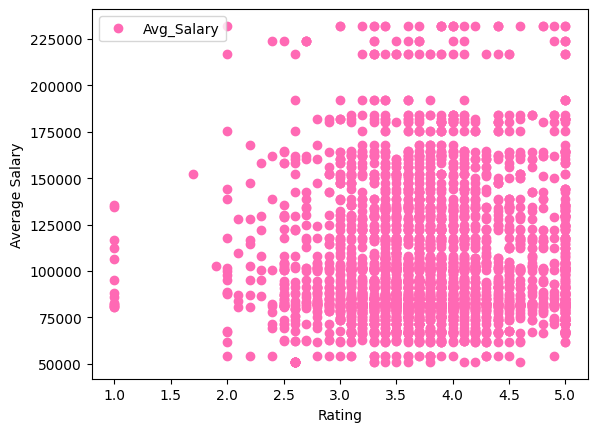

In [6]:
#Visualize the change in the variables 
import matplotlib.pyplot as plt
df.plot(x='Rating', y='Avg_Salary', style='o', color='#FF69B4')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()

In [7]:
df['Avg_Salary'].isna().any()

False

In [8]:
df['Rating'].fillna(df['Rating'].mean(),inplace =True)

In [9]:
df['Rating'].isna().sum()

0

In [10]:
#Put the data into independent and dependent variables 

x=pd.DataFrame(df['Rating'])
y=pd.DataFrame(df['Avg_Salary'])

In [11]:
#Training and testing data sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest, = train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(3273, 1)
(819, 1)
(3273, 1)
(819, 1)


In [16]:
#Training the algo
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)

[84922.785676]


In [17]:
from sklearn.linear_model import LinearRegression
a=pd.DataFrame(regressor.coef_, index =['Rating']).transpose()
b=pd.DataFrame(x.columns,columns= ['Avg_Salary'])
coef_df=pd.concat([a,b], axis=1, join ='inner')
print(coef_df)


        Rating Avg_Salary
0  2759.627079     Rating


In [18]:
#Predicting
ypred=regressor.predict(xtest)
ypred=pd.DataFrame(ypred, columns=['Predicted'])
ypred

,Predicted
0,94029.555036
1,95305.984799
2,96789.182115
3,95305.984799
4,98720.921070
...,...
814,95133.405867
815,97065.144823
816,95305.984799
817,95305.984799


In [19]:
print(ytest)

      Avg_Salary
1610     54000.0
2997     78000.0
1754     81000.0
3775      3300.0
230     134500.0
...          ...
756      78500.0
3350    150000.0
3979      3200.0
1848     82500.0
2785     81000.0

[819 rows x 1 columns]


In [22]:
#Evaluating the algo
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,ypred))
print('Mean Squared Error:',metrics.mean_squared_error(ytest,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))

Mean Absolute Error: 33432.74751392698
Mean Squared Error: 2136530984.6263819
Root Mean Squared Error: 46222.624164216184


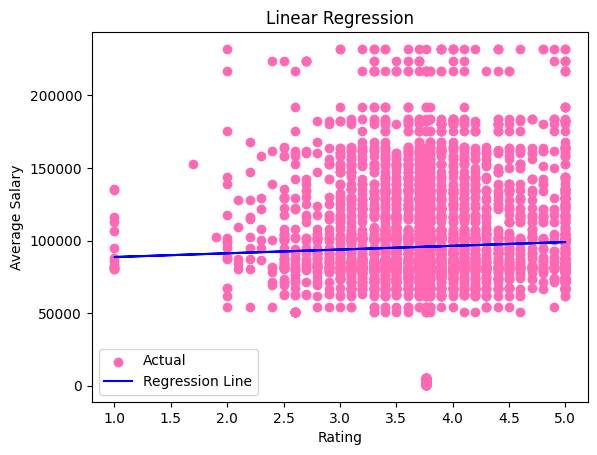

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df['Rating'].values.reshape(-1, 1)
y = df['Avg_Salary'].values

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict using the model
y_pred = model.predict(x)

# Plot the data points and the regression line
plt.scatter(x, y, color='#FF69B4', label='Actual')
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.title('Linear Regression')
plt.legend()
plt.show()

